In [52]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [53]:
!wget -q -O 'Canada_postal_code.html' https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M
print('Data downloaded!')
filename='Canada_postal_code.html'

Data downloaded!


# Question 1: DataFrame['Postcode','Borough','Neighborhood'] 

In [54]:
headers = ['PostalCode','Borough','Neighborhood']
list_html = pd.read_html(filename)
df=list_html[0]
df.columns=df.iloc[0]
df=df.drop(df.index[0])
df=df[df['Borough']!='Not assigned']
#df.apply(lambda x: "{%s}" % ', '.join(x))
df1=df.groupby('Postcode')['Borough'].apply(lambda x: "%s" % '/'.join(x).split('/')[0])
df2=df.groupby('Postcode')['Neighbourhood'].apply(lambda x: "%s" % ', '.join(x)) #.apply(list)
df3=pd.DataFrame(columns=['Postcode','Borough','Neighborhood'])
df3['Borough']=df1
df3['Neighborhood']=df2
df3['Postcode']=df3.index
df3.index=range(103)
df3

,Postcode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


# Question2: DataFrame['Postcode','Borough','Neighborhood','lat,'lon']

In [55]:
!wget -q -O 'geo_loc.csv' http://cocl.us/Geospatial_data

In [56]:
filename='geo_loc.csv'
geo_df = pd.read_csv(filename)
geo_df

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


In [57]:
df3['Latitude']=geo_df['Latitude']
df3['Longitude']=geo_df['Longitude']

In [58]:
df3

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


In [59]:
df3.groupby('Borough')['Postcode'].count()

Borough
Central Toronto      9
Downtown Toronto    18
East Toronto         5
East York            5
Etobicoke           12
Mississauga          1
North York          24
Queen's Park         1
Scarborough         17
West Toronto         6
York                 5
Name: Postcode, dtype: int64

# Question 3: Toronto neighborhood per income
I downloaded Toronto demographics from Wikipedia and built a dataframe demo_df with columns Neighborhood, Population, Income and Density. This dataframe is merged to geolocalization data. The neighborhoods are clustered per Income using kMean algorithm. We use 5 clusters: Low, Low-Medium, Medium, Medium-High and High. The data is plotted on the map of Toronto.

In [60]:
!wget -q -O 'Toronto_demographics.html' https://en.wikipedia.org/wiki/Demographics_of_Toronto_neighbourhoods
print('Data downloaded!')
filename='Toronto_demographics.html'

Data downloaded!


In [61]:
list_html = pd.read_html(filename)
demo_df=list_html[1]
demo_df.columns=demo_df.iloc[0]
demo_df=demo_df.drop(demo_df.index[0])
demo_df=demo_df.drop(demo_df.index[0])
demo_df1=pd.DataFrame(columns=['Neighborhood','Population','Income','Density'])
demo_df1['Neighborhood']=demo_df['Name']
demo_df1['Population']=demo_df['Population']
demo_df1['Income']=demo_df['Average Income']
demo_df1['Density']=demo_df['Density (people/km2)']
demo_df1.reset_index=range(173) #df.columns=['Postcode','Borough','Neighborhood']
demo_df1

,Neighborhood,Population,Income,Density
2,Agincourt,44577,25750,3580
3,Alderwood,11656,35239,2360
4,Alexandra Park,4355,19687,13609
5,Allenby,2513,245592,4333
6,Amesbury,17318,27546,4934
7,Armour Heights,4384,116651,1914
8,Banbury,6641,92319,2442
9,Bathurst Manor,14945,34169,3187
10,Bay Street Corridor,4787,40598,43518
11,Bayview Village,12280,46752,2966


In [62]:
df.columns=['Postcode','Borough','Neighborhood']
df_joined = pd.merge(df, demo_df1, how='inner', on = 'Neighborhood')
df_joined

,Postcode,Borough,Neighborhood,Population,Income,Density
0,M3A,North York,Parkwoods,26533,34811,5349
1,M4A,North York,Victoria Village,17047,29657,3612
2,M6A,North York,Lawrence Heights,3769,29867,1178
3,M6A,North York,Lawrence Manor,13750,36361,6425
4,M1B,Scarborough,Rouge,22724,29230,791
5,M1B,Scarborough,Malvern,44324,25677,5003
6,M5B,Downtown Toronto,Garden District,8240,37614,15846
7,M9B,Etobicoke,Princess Gardens,9288,80607,2249
8,M9B,Etobicoke,West Deane Park,4395,41582,2063
9,M1C,Scarborough,Highland Creek,12853,33640,2505


In [63]:
from sklearn.preprocessing import StandardScaler
df_joined['Population']=df_joined['Population'].astype('float64')
df_joined['Income']=df_joined['Income'].astype('float64')
df_joined['Density']=df_joined['Density'].astype('float64')
X = df_joined.drop(['Postcode','Borough','Neighborhood','Population','Density'],axis=1)
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)
#cluster_dataset

In [64]:
num_clusters = 3
k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset)
labels = k_means.labels_

print(labels)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 2 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 2 0 0 0 1 1 0 0 0 2
 0 0 0 1 0 0]


In [65]:
df_joined['LABEL']=labels

In [66]:
df_joined.groupby('LABEL').count()

,Postcode,Borough,Neighborhood,Population,Income,Density
LABEL,,,,,,
0,67,67,67,67,67,67
1,10,10,10,10,10,10
2,3,3,3,3,3,3


In [67]:
#df_joined1 = pd.merge(geo_df, df_joined, how='inner', on = 'Postcode')
geo_df.columns=['Postcode','Latitude','Longitude']
df_joined1 = pd.merge(geo_df, df_joined, how='inner', on = 'Postcode')
df_joined1

,Postcode,Latitude,Longitude,Borough,Neighborhood,Population,Income,Density,LABEL
0,M1B,43.806686,-79.194353,Scarborough,Rouge,22724.0,29230.0,791.0,0
1,M1B,43.806686,-79.194353,Scarborough,Malvern,44324.0,25677.0,5003.0,0
2,M1C,43.784535,-79.160497,Scarborough,Highland Creek,12853.0,33640.0,2505.0,0
3,M1C,43.784535,-79.160497,Scarborough,Rouge Hill,11167.0,32858.0,2878.0,0
4,M1C,43.784535,-79.160497,Scarborough,Port Union,12450.0,48117.0,2310.0,0
5,M1E,43.763573,-79.188711,Scarborough,Guildwood,12820.0,40806.0,2688.0,0
6,M1E,43.763573,-79.188711,Scarborough,Morningside,11472.0,27139.0,4112.0,0
7,M1E,43.763573,-79.188711,Scarborough,West Hill,25632.0,27936.0,2676.0,0
8,M1G,43.770992,-79.216917,Scarborough,Woburn,48507.0,26190.0,3636.0,0
9,M1J,43.744734,-79.239476,Scarborough,Scarborough Village,12796.0,24413.0,6303.0,0


In [68]:
latitude = 43.65
longitude = -79.38
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(num_clusters)
ys = [i + x + (i*x)**2 for i in range(num_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_joined1['Latitude'], df_joined1['Longitude'], df_joined1['Neighborhood'], df_joined1['LABEL']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       

map_clusters

# Result of kMeans

In [69]:
df_joined1['Population']=df_joined1['Population'].astype('float64')
df_joined1['Income']=df_joined1['Income'].astype('float64')
df_joined1['Density']=df_joined1['Density'].astype('float64')
df_joined1.groupby('LABEL').mean()

,Latitude,Longitude,Population,Income,Density
LABEL,,,,,
0,43.709180,-79.382418,15862.208955,34395.865672,6928.582090
1,43.689903,-79.412407,12670.300000,88471.500000,6150.600000
2,43.699052,-79.383160,6266.333333,194292.000000,2869.333333


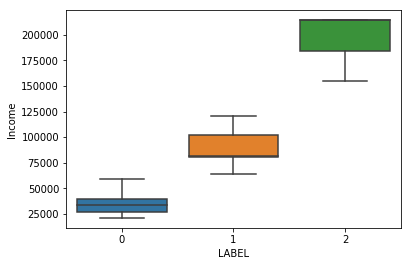

In [70]:
import seaborn as sns
sns.boxplot(x="LABEL", y="Income", data=df_joined1)

In [71]:
df_joined1.groupby('LABEL').describe()

Density                                                             \
        count         mean           std     min     25%     50%     75%   
LABEL                                                                      
0        67.0  6928.582090  10727.010195   198.0  3016.0  4013.0  6639.0   
1        10.0  6150.600000   3322.548493  2249.0  3786.0  5328.5  9304.5   
2         3.0  2869.333333   1066.321871  1828.0  2324.5  2821.0  3390.0   

               Income                                                    \
           max  count           mean           std       min        25%   
LABEL                                                                     
0      63765.0   67.0   34395.865672   9243.174999   21155.0   26638.00   
1      10795.0   10.0   88471.500000  18533.797448   63636.0   80631.25   
2       3959.0    3.0  194292.000000  34179.529063  154825.0  184383.00   

                                    Latitude                                  \
            50%       75%       max    count       mean       std        min   
LABEL                                                                          
0       33392.0   39540.5   58681.0     67.0  43.709180  0.057577  43.602414   
1       81748.5  101954.0  120453.0     10.0  43.689903  0.034071  43.650943   
2      213941.0  214025.5  214110.0      3.0  43.699052  0.025582  43.679563   

                                                  Longitude             \
             25%        50%        75%        max     count       mean   
LABEL                                                                    
0      43.653206  43.711112  43.755316  43.815252      67.0 -79.382418   
1      43.672710  43.681385  43.703398  43.757490      10.0 -79.412407   
2      43.684568  43.689574  43.708797  43.728020       3.0 -79.383160   

                                                                        \
            std        min        25%        50%        75%        max   
LABEL                                                                    
0      0.122930 -79.588437 -79.484450 -79.385975 -79.284577 -79.160497   
1      0.072808 -79.554724 -79.416232 -79.402864 -79.381048 -79.293031   
2      0.005630 -79.388790 -79.385975 -79.383160 -79.380345 -79.377529   

      Population                                                       \
           count          mean           std     min     25%      50%   
LABEL                                                                   
0           67.0  15862.208955  10504.849333   627.0  9932.5  13025.0   
1           10.0  12670.300000   4870.330015  6045.0  8907.0  13812.5   
2            3.0   6266.333333   1633.687343  4474.0  5563.5   6653.0   

                          
            75%      max  
LABEL                     
0      17800.50  48507.0  
1      15492.75  20416.0  
2       7162.50   7672.0

# Call Foursquare API
Number of restaurants per neighborhood

In [72]:
CLIENT_ID = 'ID31GX1BQECPQEVNLFYP4VHZGEZROF3AMJMQ3VHYGCHTSMCZ' # your Foursquare ID
CLIENT_SECRET = 'JQ3TDXNUR0BK3UXIPCHIFQ1OUW4ZEHUB2GRK5WXLPZDZVTQA' # your Foursquare Secret
VERSION = '20190909'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ID31GX1BQECPQEVNLFYP4VHZGEZROF3AMJMQ3VHYGCHTSMCZ
CLIENT_SECRET:JQ3TDXNUR0BK3UXIPCHIFQ1OUW4ZEHUB2GRK5WXLPZDZVTQA


In [73]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

df_joined1['restaurant']=np.zeros(80)

for i in range(80):
    df_joined1.loc[i, 'Neighborhood']
    df_joined1.shape
    neighborhood_latitude=df_joined1.loc[i, 'Latitude']
    neighborhood_longitude=df_joined1.loc[i, 'Longitude']
    LIMIT = 100
    radius = 1000 #in meters
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        neighborhood_latitude, 
        neighborhood_longitude, 
        radius, 
        LIMIT)
    url
    results = requests.get(url).json()


    venues = results['response']['groups'][0]['items']
    
    nearby_venues = json_normalize(venues) # flatten JSON

    # filter columns
    filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
    nearby_venues =nearby_venues.loc[:, filtered_columns]

    # filter the category for each row
    nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

    # clean columns
    nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
    df_joined1.loc[i, 'restaurant']=nearby_venues.shape[0]

#for i in range(80):
#    print(df_joined1.loc[i, 'Neighborhood'])

# FINAL RESULTS

In [74]:
df_joined1.head()

,Postcode,Latitude,Longitude,Borough,Neighborhood,Population,Income,Density,LABEL,restaurant
0,M1B,43.806686,-79.194353,Scarborough,Rouge,22724.0,29230.0,791.0,0,18.0
1,M1B,43.806686,-79.194353,Scarborough,Malvern,44324.0,25677.0,5003.0,0,18.0
2,M1C,43.784535,-79.160497,Scarborough,Highland Creek,12853.0,33640.0,2505.0,0,5.0
3,M1C,43.784535,-79.160497,Scarborough,Rouge Hill,11167.0,32858.0,2878.0,0,5.0
4,M1C,43.784535,-79.160497,Scarborough,Port Union,12450.0,48117.0,2310.0,0,5.0


In [75]:
df_joined1[df_joined1['LABEL']==2]

,Postcode,Latitude,Longitude,Borough,Neighborhood,Population,Income,Density,LABEL,restaurant
35,M4N,43.728020,-79.388790,Central Toronto,Lawrence Park,6653.0,214110.0,1828.0,2,9.0
37,M4T,43.689574,-79.383160,Central Toronto,Moore Park,4474.0,154825.0,3959.0,2,59.0
40,M4W,43.679563,-79.377529,Downtown Toronto,Rosedale,7672.0,213941.0,2821.0,2,27.0


In [76]:
df_joined1.groupby('LABEL').count()

,Postcode,Latitude,Longitude,Borough,Neighborhood,Population,Income,Density,restaurant
LABEL,,,,,,,,,
0,67,67,67,67,67,67,67,67,67
1,10,10,10,10,10,10,10,10,10
2,3,3,3,3,3,3,3,3,3


In [77]:
df_joined1[df_joined1['LABEL']==0]

,Postcode,Latitude,Longitude,Borough,Neighborhood,Population,Income,Density,LABEL,restaurant
0,M1B,43.806686,-79.194353,Scarborough,Rouge,22724.0,29230.0,791.0,0,18.0
1,M1B,43.806686,-79.194353,Scarborough,Malvern,44324.0,25677.0,5003.0,0,18.0
2,M1C,43.784535,-79.160497,Scarborough,Highland Creek,12853.0,33640.0,2505.0,0,5.0
3,M1C,43.784535,-79.160497,Scarborough,Rouge Hill,11167.0,32858.0,2878.0,0,5.0
4,M1C,43.784535,-79.160497,Scarborough,Port Union,12450.0,48117.0,2310.0,0,5.0
5,M1E,43.763573,-79.188711,Scarborough,Guildwood,12820.0,40806.0,2688.0,0,24.0
6,M1E,43.763573,-79.188711,Scarborough,Morningside,11472.0,27139.0,4112.0,0,24.0
7,M1E,43.763573,-79.188711,Scarborough,West Hill,25632.0,27936.0,2676.0,0,24.0
8,M1G,43.770992,-79.216917,Scarborough,Woburn,48507.0,26190.0,3636.0,0,9.0
9,M1J,43.744734,-79.239476,Scarborough,Scarborough Village,12796.0,24413.0,6303.0,0,12.0
